<a href="https://colab.research.google.com/github/Mariana-Arantes/data_science/blob/main/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Data Science na Prática 2.0**
*by [Mariana Arantes](https://www.linkedin.com/in/mariana-arantes-/)*

---
<center>

# **Analisando a Violência no Rio de Janeiro**


---



<img alt="Rio de Janeiro" width="80%" src="https://raw.githubusercontent.com/Mariana-Arantes/data_science/main/RJ.png">


  </center>






Infelizmente a violência e criminalidade são problemas de contexto mundial e uma cidade do Brasil que vem ganhando cada vez mais o destaque nos noticiários é o Rio de Janeiro.

O tráfico de drogas e de armas que cresceu no fim da décadade 80, foi responsável pela mudança na criminalidade na cidade. A violência instalada  dentro das comunidades carentes, forneceu também uma visão assustadora  para os bairros "nobres" da cidade em forma de balas perdidas, "arrastões", assaltos, seqüestros e latrocínios. 

E para nos ajudar a entender um pouco mais deste cenário, as leis de acesso à informação e a conscientização dos órgãos públicos, passaram a disponibilizar várias fontes de dados.

Iremos analisar aqui os dados abertos disponibilizados pelo Instituto de Segurança Pública do Rio de Janeiro, com informações do histórico mensal das delegacias de desde 01/1991 a 08/2019.


## Obtenção dos Dados

Os dados foram obtidos no [Portal ISPDados](http://www.ispdados.rj.gov.br/estatistica.html).

Este *dataset* utilizado aqui pode pode ser baixado diretamente [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv).





### Importando os dados



In [1]:
#importa a biblioteca necessária
import pandas as pd
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv")

## Análise Inicial dos Dados

Podemos verificar abaixo que o DataFrame utilizado possui 56 colunas e 344 linhas. Vemos também o nome de todas as colunas, tipos e se possuem dados ausentes.

Esse tipo de informação será muito útil e nos ajudará a direcionar o trabalho na fase de limpeza dos dados.

In [2]:
# Mostra o tamanho, nome e tipo das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   vano                        344 non-null    int64  
 1   mes                         344 non-null    int64  
 2   hom_doloso                  344 non-null    int64  
 3   lesao_corp_morte            248 non-null    float64
 4   latrocinio                  344 non-null    int64  
 5   hom_por_interv_policial     260 non-null    float64
 6   tentat_hom                  344 non-null    int64  
 7   lesao_corp_dolosa           344 non-null    int64  
 8   estupro                     200 non-null    float64
 9   hom_culposo                 260 non-null    float64
 10  lesao_corp_culposa          248 non-null    float64
 11  roubo_comercio              344 non-null    int64  
 12  roubo_residencia            344 non-null    int64  
 13  roubo_veiculo               344 non

Vamos agora dar uma olhada como este Dataset está organizado e como os dados são apresentados.


In [3]:
#Visualiza as 5 primeiras linhas
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


Como podemos observar na amostra acima, existem muitos dados ausentes.
Dependendo do percentual de dados faltantes de uma coluna específica, teremos que realizar alguns processos para que a nossa análise estatística seja o mais assertiva possível.



Em seguida temos o percentual de dados ausentes de cada coluna em ordem crescente, chamando a atenção para as proporções consideráveis dos crimes relacionados a bicicletas e apreensão de drogas.

In [ ]:
#Mostra a porcentagem de valores ausentes das colunas
(df.isnull().sum() /df.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

O percentual de valores ausentes está relacionada ao ano que estas variáveis passaram a ser registradas, segundo o [dicionário](https://www.ispdados.rj.gov.br:4432/Notas.html) do ISP. 

Diante desta informação, vamos verificar a partir de qual ano cada variável começou a ser registrada, com exceção da coluna **ano** e **mes**.

In [17]:
#Criando uma variável do tipo dicionário para receber os valores dos anos que começaram o registro para cada variável
ano_registro = {}

#Loop para pegar os anos que começaram o preenchimento por variável
for nome_coluna in df.columns:

  #Desconsiderar a variável ano e mês
  if (nome_coluna != "ano") or (nome_coluna != "mes"):

    ano_registro[nome_coluna] = df['vano'][df.loc[df[nome_coluna].isnull() == False].index[0]]

#Imprimindo o dicionário
ano_registro

{'aaapai': 2006,
 'ameaca': 1999,
 'apf': 2006,
 'apreensao_drogas': 1991,
 'apreensao_drogas_sem_autor': 2006,
 'cmba': 2006,
 'cmp': 2006,
 'encontro_cadaver': 1991,
 'encontro_ossada': 2002,
 'estelionato': 2003,
 'estupro': 2003,
 'extorsao': 2003,
 'fase': 1991,
 'furto_bicicleta': 2014,
 'furto_celular': 2003,
 'furto_coletivo': 2003,
 'furto_transeunte': 1991,
 'furto_veiculos': 1991,
 'hom_culposo': 1998,
 'hom_doloso': 1991,
 'hom_por_interv_policial': 1998,
 'indicador_letalidade': 1991,
 'indicador_roubo_rua': 1991,
 'indicador_roubo_veic': 1991,
 'latrocinio': 1991,
 'lesao_corp_culposa': 1999,
 'lesao_corp_dolosa': 1991,
 'lesao_corp_morte': 1999,
 'mes': 1991,
 'outros_furtos': 1991,
 'outros_roubos': 1991,
 'pessoas_desaparecidas': 2002,
 'pol_civis_mortos_serv': 2003,
 'pol_militares_mortos_serv': 2003,
 'posse_drogas': 2006,
 'recuperacao_veiculos': 1991,
 'registro_ocorrencias': 1999,
 'roubo_apos_saque': 2003,
 'roubo_banco': 1991,
 'roubo_bicicleta': 2014,
 'roubo_c

Diante desta evolução de registro e em busca de dados com maior confiabilidade, vamos analisar os dados referentes aos ultimos 10 anos. 

Vamos definir um novo dataframe com dados a partir do ano de 2010 e exibir as 5 primeiras linhas 

Utilizaremos este novo *dataset* para as análises nas seções posteriores.

In [13]:
#Definindo um df com base em um ano de corte a partir de 2010
df_corte_2010 = df.drop(df.loc[ df['vano'] < 2010 ].index,axis=0)

In [14]:
#Imprimindo as 5 primeiras linhas
df_corte_2010.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
228,2010,1,447,6.0,19,77.0,377,7716,345.0,161.0,3511.0,373,123,1945,234,5292,568,1,4.0,622.0,10.0,139.0,NaN,1036,10347,1683,2618,704.0,1768.0,NaN,8077,14850,2.0,89.0,5.0,1716.0,891,301.0,466.0,143.0,1497,1763.0,385.0,695.0,43.0,6868.0,481.0,69,2.0,3.0,3.0,549,6482,1945,56534.0,3
229,2010,2,473,3.0,6,62.0,329,7201,391.0,198.0,3267.0,348,116,1739,221,5361,582,2,1.0,546.0,6.0,123.0,NaN,1003,10048,1669,4095,710.0,1985.0,NaN,7897,16356,0.0,65.0,7.0,1628.0,865,286.0,463.0,135.0,1320,1664.0,326.0,753.0,21.0,6403.0,473.0,67,1.0,1.0,0.0,544,6489,1739,56299.0,3
230,2010,3,492,4.0,17,81.0,391,6767,341.0,186.0,3661.0,441,148,2041,229,6036,795,2,3.0,693.0,14.0,145.0,NaN,1100,11647,1713,2744,871.0,1954.0,NaN,8260,15542,2.0,169.0,12.0,2249.0,933,309.0,507.0,140.0,1584,1861.0,397.0,958.0,45.0,6618.0,447.0,57,3.0,0.0,0.0,594,7524,2041,59907.0,3
231,2010,4,432,2.0,11,102.0,347,6185,337.0,216.0,3209.0,420,113,1784,181,5581,716,2,1.0,574.0,6.0,129.0,NaN,990,10497,1594,2263,789.0,1768.0,NaN,7381,13795,0.0,140.0,6.0,1813.0,871,274.0,477.0,133.0,1378,1803.0,395.0,727.0,31.0,6051.0,437.0,45,1.0,0.0,0.0,547,6871,1784,53658.0,3
232,2010,5,361,7.0,11,109.0,345,6267,345.0,208.0,3674.0,441,132,1648,215,5749,691,2,3.0,650.0,8.0,147.0,NaN,963,10649,1670,2639,868.0,1941.0,NaN,8052,15170,0.0,122.0,5.0,2215.0,1038,351.0,557.0,151.0,1438,2031.0,409.0,1197.0,41.0,5892.0,403.0,44,2.0,1.0,0.0,488,7090,1648,58057.0,3


## Informações Estatísticas da Violência no Rio de Janeiro

Utilizando o método `describe`, teremos um resumo estatístico com informações que podem nos ajudar a:

* Identificar outliers.
* Entender melhor a distribuição dos dados.
* Identificar falhas na distribuição dos dados.
* Após a limpeza dos dados, verificar a eficácia e as diferenças entre os dados tratados e não tratados.




In [16]:
# Imprimir o resumo estatístico do DataFrame
df_corte_2010.describe()


,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,68.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,68.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,2014.344828,6.362069,388.525862,3.456897,13.646552,71.353448,452.034483,6422.448276,435.706897,177.094828,3265.827586,515.956897,108.353448,2834.043103,525.250000,6017.672414,832.767241,2.025862,3.413793,1130.422414,7.767241,114.887931,10.808824,1480.215517,13579.112069,1396.344828,2512.784483,817.310345,1524.189655,124.808824,7800.413793,14124.206897,0.534483,143.413793,9.672414,2764.577586,1795.543103,720.034483,920.560345,191.103448,2091.000000,2658.327586,679.767241,1411.517241,98.241379,6029.103448,463.758621,40.241379,3.017241,1.758621,0.258621,476.982759,7980.862069,2834.043103,63124.965517,2.982759
std,2.807144,3.437382,55.035555,2.111633,5.303410,40.493103,85.346040,1096.391134,54.181662,28.604949,739.331382,112.035894,17.356244,1073.672773,268.701932,1460.255652,386.868753,1.308575,2.395899,771.006605,3.728522,42.759748,7.767628,703.894629,4357.413255,115.292453,781.754068,128.645277,263.871771,80.247427,820.301589,1673.990029,0.954905,30.265224,4.781806,475.603418,420.051910,206.124485,218.054452,38.633254,665.713008,435.147787,209.946343,296.143839,68.811352,1145.332246,65.328284,11.184322,2.068323,1.591394,0.561375,76.388251,2486.451069,1073.672773,5644.615222,0.130734
min,2010.000000,1.000000,272.000000,0.000000,5.000000,15.000000,272.000000,2521.000000,324.000000,111.000000,848.000000,277.000000,49.000000,1413.000000,170.000000,2260.000000,345.000000,0.000000,0.000000,301.000000,1.000000,11.000000,0.000000,782.000000,7740.000000,1159.000000,663.000000,167.000000,527.000000,0.000000,3089.000000,5795.000000,0.000000,49.000000,1.000000,717.000000,865.000000,274.000000,463.000000,114.000000,1219.000000,1664.000000,326.000000,695.000000,21.000000,1409.000000,236.000000,16.000000,0.000000,0.000000,0.000000,334.000000,3298.000000,1413.000000,31231.000000,2.000000
25%,2012.000000,3.000000,345.000000,2.000000,10.000000,40.500000,377.750000,5620.750000,400.500000,155.750000,2610.000000,420.000000,97.000000,1862.750000,287.000000,4768.250000,540.750000,1.000000,2.000000,479.750000,5.000000,79.000000,2.250000,919.750000,9715.500000,1317.500000,1985.000000,747.500000,1355.000000,3.750000,7376.250000,13169.500000,0.000000,125.000000,6.000000,2588.500000,1539.250000,604.000000,739.250000,164.500000,1471.500000,2359.750000,500.000000,1203.750000,52.750000,5050.750000,418.500000,33.000000,1.000000,1.000000,0.000000,419.750000,5880.500000,1862.750000,59858.500000,3.000000
50%,2014.000000,6.000000,380.500000,3.000000,12.500000,61.000000,464.500000,6423.000000,430.500000,175.000000,3462.000000,515.500000,107

### Crimes Contra o Patrimônio - Veículos
Os crimes relacionados a roubo e furto de veículos é um problema comum nas grandes metrópoles brasileiras. Iremos então utilizar as informações contidas neste dataset para encontrar resultados pertinentes em relação à situação e ao combate a esse tipo de crime.

Analisando os resultados abaixo, podemos observar que 49% dos veículos roubados ou furtados foram recuperados.

In [19]:
# Mostra a média das variáveis roubo_veiculo, furto_veiculos e recuperacao_veiculos
mean_roubo_veiculo = round(df_corte_2010.roubo_veiculo.mean(),2)
mean_furto_veiculos = round(df_corte_2010.furto_veiculos.mean(),2)
mean_recuperacao_veiculos = round(df_corte_2010.recuperacao_veiculos.mean(),2)

print (('Média de roubo a veículos: '), mean_roubo_veiculo)
print (('Média de furto a veículos: '), mean_furto_veiculos)
print (('Média de recuperação de veículos: '), mean_recuperacao_veiculos)


# Mostra o total de veículos perdidos
total = mean_roubo_veiculo + mean_furto_veiculos
print('Média total de Veículos Perdidos por Mês: {:.2f} '.format(total))
print('Veículos Recuperados por Mês: {:.2f}'.format(mean_recuperacao_veiculos))

# Mostra a porcentagem de veículos recuperados
pct = mean_recuperacao_veiculos/total*100

print('Veículos recuperados: {:.2f}%'.format(pct))

Média de roubo a veículos:  2834.04
Média de furto a veículos:  1396.34
Média de recuperação de veículos:  2091.0
Média total de Veículos Perdidos por Mês: 4230.38 
Veículos Recuperados por Mês: 2091.00
Veículos recuperados: 49.43%


### Crimes Contra a Vida

Vamos agora identificar qual foi o máximo e mínimo registrado para a variável `hom_doloso` ao longo do período observado no dataset.
Podemos ver que no mês com menor número de casos foram registrados 272 homicídios dolosos.

Em relação ao mês com números mais elevado, houveram 510 homicídios dolosos.

In [20]:
# valores max e min de hom_doloso
max_hom_doloso = df_corte_2010.hom_doloso.max()
min_hom_doloso = df_corte_2010.hom_doloso.min()

# imprimir os valores máximos e mínimos
print("Min:\t{}".format(min_hom_doloso))
print("Max:\t{}".format(max_hom_doloso))

Min:	272
Max:	510


Abaixo, vemos que Julho de 2015 foi o mês com menos casos de homicídios dolosos registrados no nosso dataset, enquanto Março de 2014 foi o mês com maior número de casos.


In [22]:
# verificando o mês com menor número de homicídios dolosos
df_corte_2010[df_corte_2010.hom_doloso == 272]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
293,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3


In [23]:
# verificando o mês com maior número de homicídios dolosos
df_corte_2010[df_corte_2010.hom_doloso == 510]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
278,2014,3,510,5.0,10,46.0,544,8357,479.0,214.0,3938.0,773,125,2947,401,7014,639,2,4.0,555.0,16.0,94.0,0.0,1141,13711,1640,4564,974.0,1577.0,0.0,9248,18003,1.0,175.0,17.0,2745.0,2046,871.0,1002.0,228.0,2355,3154.0,1077.0,1533.0,60.0,8154.0,563.0,59,2.0,5.0,0.0,571,8208,2947,72915.0,3


## Visualização de Dados

Para nos ajudar a entender a distribuição dos valores em uma variável, usaremos o Histograma para mostrar a frequencia dos dados.

Abaixo, faremos essa análise em relação à variável `hom_doloso` e alguns dados chamam a nossa atenção, como:

* Houveram 25  meses com 350-400 homicídios dolosos registrados ao longo do período em estudo.
* Houveram menos de 5 meses ao longo de todo o período estudado na casa de 500 registros de homicídio doloso.

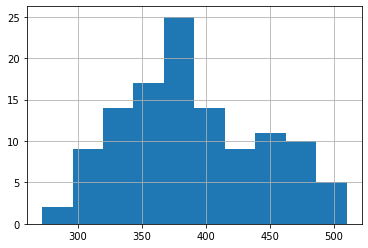

In [24]:
df_corte_2010.hom_doloso.hist();

Neste gráfico podemos observar que nos últimos anos, o homicídio doloso diminiu considerávelmente desde 1991.

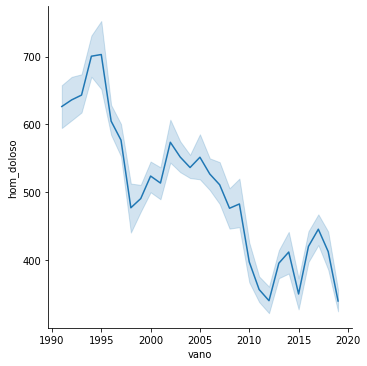

In [30]:
sns.relplot(kind="line", x="vano", y="hom_doloso", palette="Set2", data=df);

## Conclusão

Fizemos aqui uma análise bem simples da base de dados da polícia militar sobre a violência no Rio de Janeiro.
Como estarmos utilizando um dataset com dados reais, perdemos muitas informações pela ausencia de dados e presença de outliers, reforçando a importância de realizar o tratamento dos dados de forma preliminar.

Vale lembrar que a etapa de aquisição, tratamento e exploração dos dados consumiu a maior parte do tempo de projeto, porém, foi esta etapa que permitiu extrair algumas informações relevantes e sobre violência no Rio de Janeiro.

Para este estudo, definimos como *dataset* os últimos 10 anos de dados (2010 a 2019), devido a busca por uma maior confiabilidade tanto na evolução dos registros quanto na forma de preenchimento.
* 49% dos veículos roubados e furtados são recuperados pela polícia;
* Julho de 2015 foi o mês com menos casos de homicídios dolosos registrados no nosso dataset, enquanto Março de 2014 foi o mês com maior número de casos.


